# 1. Installing Dependencies and Setting Up 

In [1]:
# If already installed, you can comment these lines so they won't run again
!pip install tensorflow opencv-python matplotlib
!pip list

In [ ]:
# If it shows an error you should run this line again and it will work
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [5]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [6]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,true)

# 2. Removing Low Quality and Bad Images

In [9]:
data_dir = 'data'

In [10]:
image_exts = ['jpeg','jpg','bmp','png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
# After running this code go to your file that includes all of these photos and delete the ones that are under 10 KB

# 3. Loading the Data

In [13]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 861 files belonging to 10 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

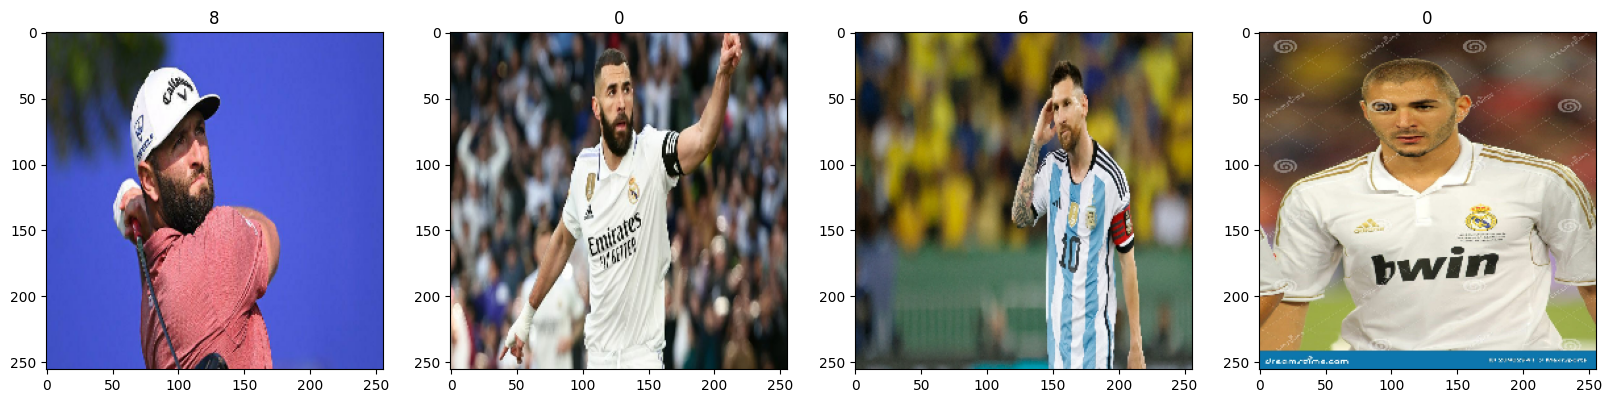

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Preprocessing the Data

## 4.1 Scale Data

In [21]:
data = data.map(lambda x, y: (x/255, y))

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

In [24]:
batch[0].max()

np.float32(1.0)

In [50]:
for images, labels in data.take(1):  # only take first element of dataset
#     print(images.numpy())
    print(labels.numpy())

[2 2 6 3 1 2 5 7 6 4 4 4 6 7 5 8 3 8 3 3 6 9 8 1 4 3 2 7 4 5 4 0]


## 4.2 Split Data

In [25]:
len(data)

27

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+2

In [27]:
train_size

18

In [28]:
val_size

5

In [29]:
test_size

4

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [31]:
len(test)

4

# 5. Build Deep Learning Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\warda\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,698,938 (14.11 MB)

 Trainable params: 3,698,938 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Training the Model

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.1025 - loss: 2.7457 - val_accuracy: 0.2125 - val_loss: 2.1998
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.2376 - loss: 2.0855 - val_accuracy: 0.3250 - val_loss: 1.8834
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4255 - loss: 1.6910 - val_accuracy: 0.5437 - val_loss: 1.5537
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7189 - loss: 1.0424 - val_accuracy: 0.6375 - val_loss: 1.2540
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8823 - loss: 0.5687 - val_accuracy: 0.7000 - val_loss: 1.1411
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9276 - loss: 0.3093 - val_accuracy: 0.7812 - val_loss: 0.8521
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9742 - loss: 0.1967 - val_accuracy: 0.8000 - val_loss: 0.8265
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9846 - loss: 0.1115 - val_accuracy: 0.7937 - val_loss:

# 7. Plotting the Performance

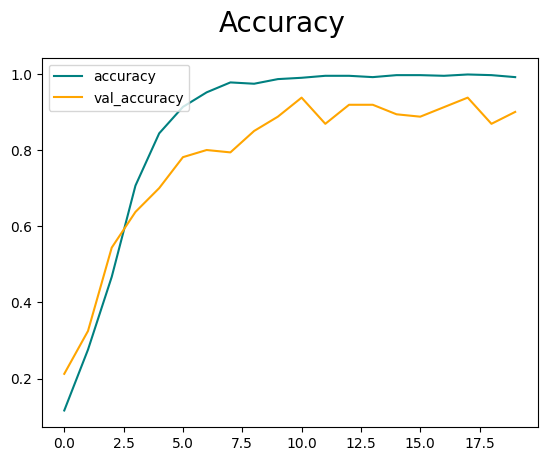

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

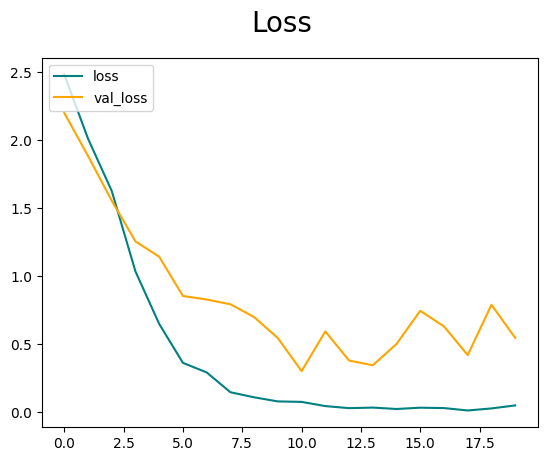

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluating the Performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

# 9. Testing the Model

In [62]:
import cv2

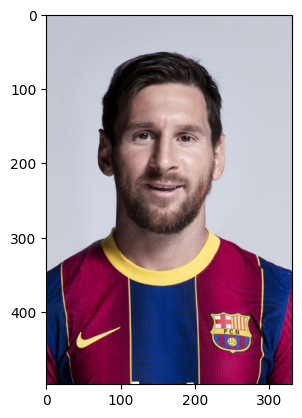

In [63]:
img = cv2.imread('messitest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

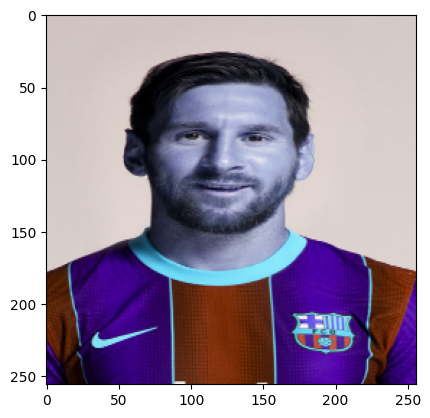

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


In [58]:
# print yhat and see what the output looks like. get argmax(yhat) (get the index of the maximum value)
# highest_yhat = argmax(yhat)
# define a LABEL_CLASSES = [BENZEMA, ... RONALDO]
# LABEL_CLASSES[highest_yhat]

In [66]:
yhat

array([[9.9046053e-07, 7.0391826e-07, 9.0124435e-04, 3.2372980e-06,
        8.4530296e-07, 6.6487087e-06, 9.9887472e-01, 4.9050719e-09,
        5.3948611e-06, 2.0610278e-04]], dtype=float32)

In [ ]:
if yhat <= 1.5: 
    print(f'Predicted class is Steph Curry')
else:
    print(f'Predicted class is Happy')

# 10. Saving the Model

In [ ]:
argmaz()

In [71]:
highest_yhat = np.argmax(yhat)
label_classes = ['Benzema', 'Curry', 'Giannis', 'Lamar', 'LeBron', 'Mbappe', 'Messi', 'Neymar', 'Rahm', 'Ronaldo']

In [72]:
highest_yhat

np.int64(6)

In [76]:
num_correct = 0
if label_classes[highest_yhat] == 'Ronaldo':
    num_correct += 1
    
accuracy = num_correct / 86

In [77]:
accuracy

0.0